In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sizes = ['new_test_large/', 'new_test_medium/']
tests = ['01/', '02/', '03/', '04/', '05/', '06/', '07/', '08/', '09/', '10/']
path = '/home/lucia/Documenti/GitHub/cloud-computing-project/jmeter/'

In [3]:
avg_cpu_df = pd.DataFrame(index=np.arange(26), columns=['average_cpu'])
avg_cpu_df['average_cpu'] = 0
avg_inst_df = pd.DataFrame(index=np.arange(34), columns=['average_instance_number'])
avg_inst_df['average_instance_number'] = 0

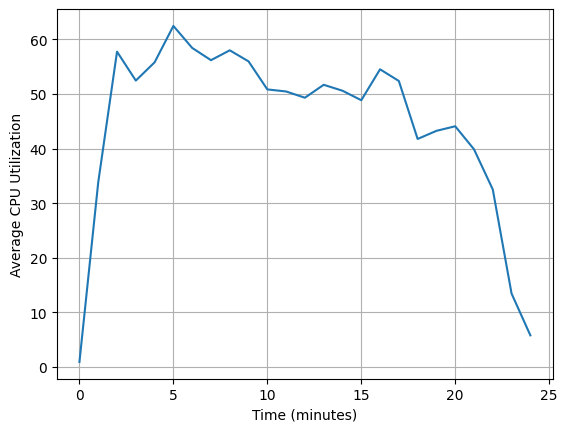

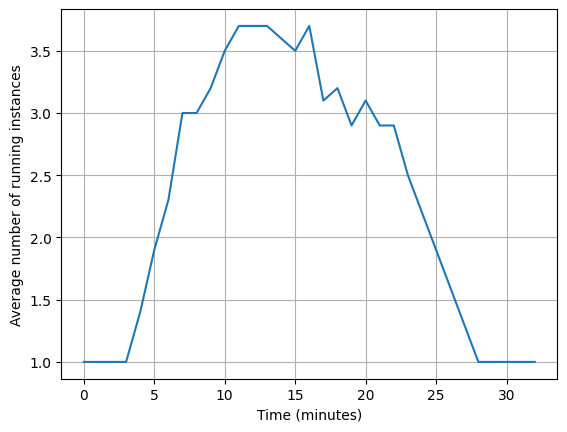

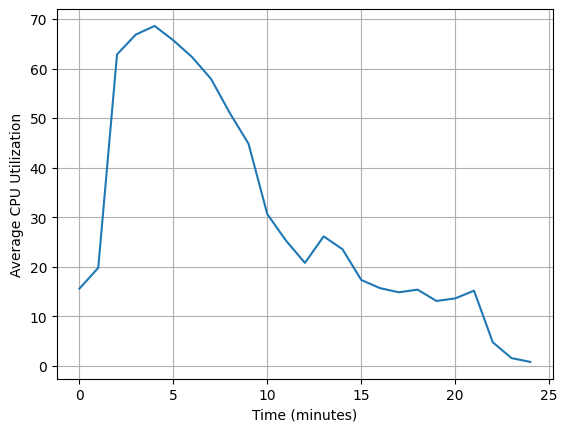

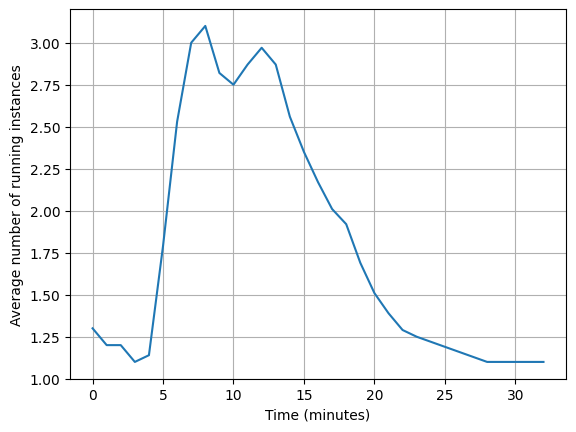

In [4]:
for size in sizes:
    path_size = path
    path_size += size
    for test in tests:
        path_test = path_size
        path_test += test
        cpu_df = pd.read_csv(path_test + "data_cpu.csv")
        avg_cpu_df = pd.concat([avg_cpu_df, cpu_df], axis=1)
        avg_cpu_df['average_cpu'] = avg_cpu_df['average_cpu'] + avg_cpu_df['Average']
        avg_cpu_df = avg_cpu_df[['average_cpu']]
        inst_df = pd.read_csv(path_test + 'data_number_instances.csv')
        avg_inst_df = pd.concat([avg_inst_df, inst_df], axis=1)
        avg_inst_df['average_instance_number'] = avg_inst_df['average_instance_number'] + avg_inst_df['Average']
        avg_inst_df = avg_inst_df[['average_instance_number']]
    avg_cpu_df['average_cpu'] = avg_cpu_df['average_cpu'] / len(tests)
    fig, ax = plt.subplots()
    ax.plot(avg_cpu_df.index, avg_cpu_df['average_cpu'])
    ax.set_xlabel('Time (minutes)')
    ax.set_ylabel('Average CPU Utilization')
    ax.grid(True)
    plt.savefig(path_size + 'avg_cpu.svg')
    avg_inst_df['average_instance_number'] = avg_inst_df['average_instance_number'] / len(tests)
    fig, ax = plt.subplots()
    ax.plot(avg_inst_df.index, avg_inst_df['average_instance_number'])
    ax.set_xlabel('Time (minutes)')
    ax.set_ylabel('Average number of running instances')
    ax.grid(True)
    plt.savefig(path_size + 'avg_instance_number.svg')

In [36]:
total_average = {}
for size in sizes:
    path_size = path
    path_size += size
    total_average[size] = {}
    for test in tests:
        path_test = path_size
        path_test += test
        log_df = pd.read_csv(path_test + "log_" + test[:-1] + ".csv")
        log_df = log_df[(log_df['label'] == 'Test') & (log_df['responseCode'].isin([200, '200']))].reset_index(drop=True)
        t = log_df['timeStamp'].head(1).values[0]
        z = log_df['timeStamp'].tail(1).values[0]
        n_chunk = 22
        l_chunk = (z - t)//n_chunk
        average = [[0, 0] for _ in range(n_chunk)]
        for _, row in log_df.iterrows():
            index = min((row['timeStamp'] - t) // l_chunk, n_chunk-1)
            average[index][0] += row['elapsed']
            average[index][1] += 1
        average = list(map(lambda x: x[0]/x[1] if x[1]!= 0 else None, average))
        total_average[size][test] = average

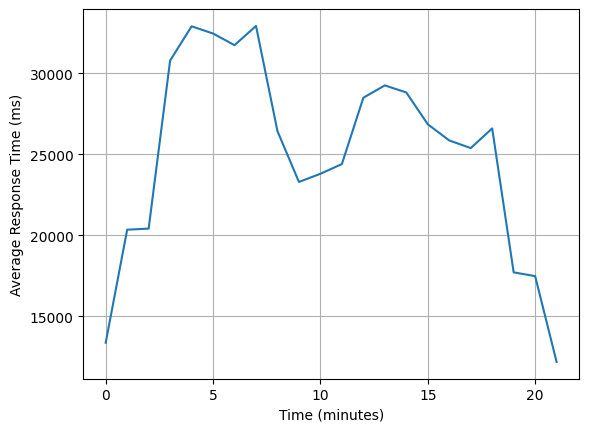

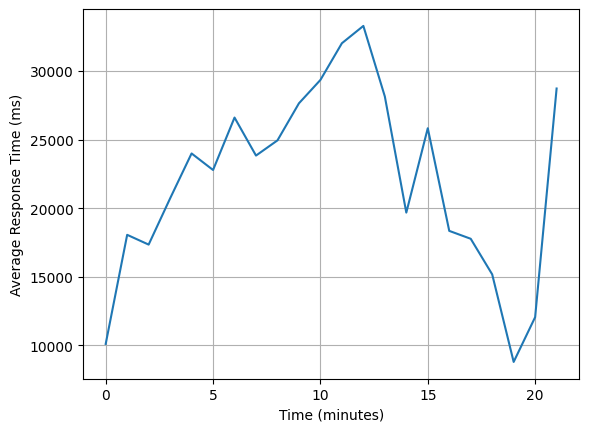

In [38]:
for size in sizes:
    path_size = path
    path_size += size
    tot = [[0,0] for _ in range(n_chunk)]
    for test in tests:
        for i, val in enumerate(total_average[size][test]):
            if val != None:
                tot[i][0] += val
                tot[i][1] += 1
    average = [x[0]/x[1] for x in tot]
    average_response_time_df = pd.DataFrame(average, columns=['avg_response_time'])
    fig, ax = plt.subplots()
    ax.plot(average_response_time_df.index, average_response_time_df['avg_response_time'])
    ax.set_xlabel('Time (minutes)')
    ax.set_ylabel('Average Response Time (ms)')
    ax.grid(True)
    plt.savefig(path_size + 'avg_response_time.svg')